In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

## Import data

In [3]:
data = pd.read_csv("mobility_data_with_names.csv", delimiter=',', index_col='ID')

In [4]:
data = data[['Populatie', 'Vervoerwijzen', 'KenmerkenVerplaatsing', 'RegioS', 'Perioden', 'Verplaatsingen_1', 'Afstand_2']]
population_total = data[data['Populatie'].isin([10000])] # filter data on total population (uitsluiten van alleen populatie 12 jaar of ouder)
car_and_train = population_total[population_total['Vervoerwijzen'].isin(['Auto (passagier)', 'Auto (bestuurder)', 'Trein', 'Totaal'])] # filter data on cars

## Kilometers per year

In [5]:
car_and_train_total = car_and_train[car_and_train['KenmerkenVerplaatsing'].isin(['Totaal'])]

## Total Kilometer per year per Province

In [6]:
total_province = car_and_train_total[car_and_train_total['RegioS'].isin(['Groningen (PV)', 
                                                                         'Friesland (PV)', 
                                                                         'Drenthe (PV)', 
                                                                         'Overijssel (PV)',
                                                                         'Flevoland (PV)',
                                                                         'Gelderland (PV)',
                                                                         'Utrecht (PV)',
                                                                         'Noord-Holland (PV)',
                                                                         'Zuid-Holland (PV)',
                                                                         'Zeeland (PV)',
                                                                         'Noord-Brabant (PV)',
                                                                         'Limburg (PV)'])]
# display(total_province)

In [7]:
total_province.loc[:, 'Dag'] = 1
total_province.loc[:, 'Maand'] = 1

total_province['Datum'] = (
    total_province['Perioden'].astype(str) + '-' +
    total_province['Maand'].astype(str).str.zfill(2) + '-' +
    total_province['Dag'].astype(str).str.zfill(2)
)
total_province['Datum'] = pd.to_datetime(total_province['Datum'])
total_province.set_index('Datum', inplace=True)
# display(total_province)

C:\Users\brigi\AppData\Local\Temp\ipykernel_17508\3289186140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_province.loc[:, 'Dag'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_17508\3289186140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_province.loc[:, 'Maand'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_17508\3289186140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Auto (bestuurder),Auto (passagier),Auto (totaal),Trein
Datum,,,,
2010-01-01,19.50,9.81,29.31,3.33
2011-01-01,18.85,8.48,27.33,3.12
2012-01-01,19.55,8.32,27.87,2.70
2013-01-01,17.86,7.07,24.93,3.19
2014-01-01,18.12,8.88,27.00,3.32
2015-01-01,19.81,9.74,29.55,NaN
2016-01-01,17.16,8.01,25.17,4.84
2017-01-01,17.23,9.54,26.77,5.06


,Auto (bestuurder),Auto (passagier),Auto (totaal),Trein
Datum,,,,
2010-01-01,14.94,6.39,21.33,2.42
2011-01-01,15.76,5.17,20.93,3.19
2012-01-01,13.79,4.79,18.58,2.12
2013-01-01,15.69,7.27,22.96,1.97
2014-01-01,14.27,5.12,19.39,2.52
2015-01-01,14.93,5.07,20.00,2.76
2016-01-01,14.69,4.67,19.36,2.87
2017-01-01,16.17,5.78,21.95,2.41


<Figure size 640x480 with 0 Axes>

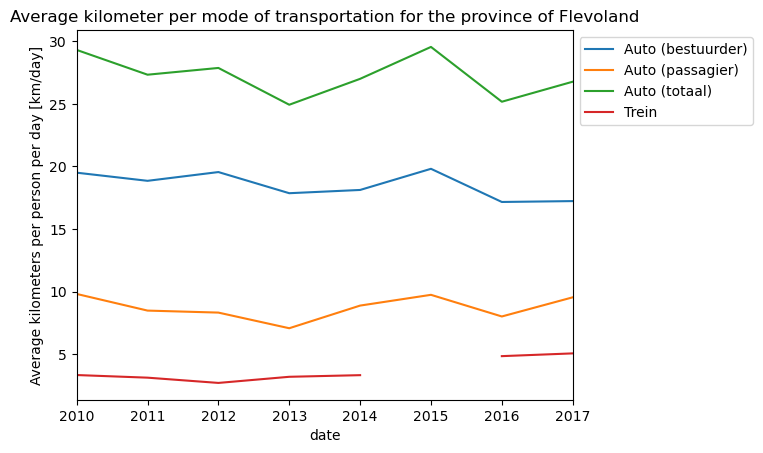

<Figure size 640x480 with 0 Axes>

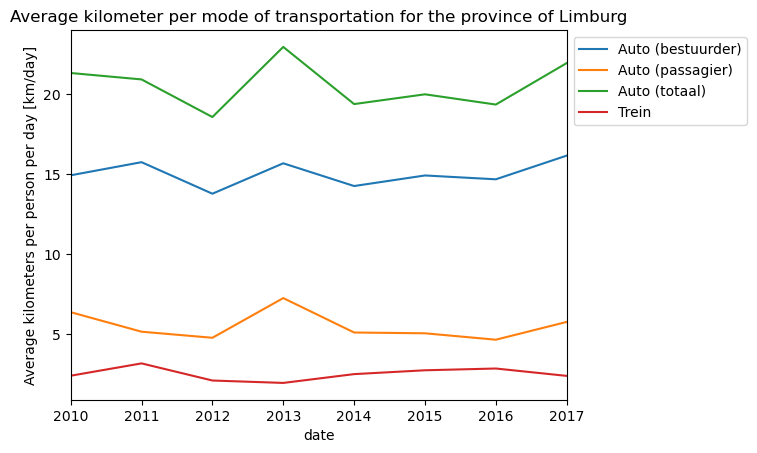

In [42]:
provinces = total_province['RegioS'].unique()
# province_name = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Flevoland', 'Gelderland', 'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Zeeland', 'Noord-Brabant', 'Limburg']
data_per_province = {}

for province in provinces:
    car_and_train_province = total_province[total_province['RegioS'] == province]
    
    car_bestuurder = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Auto (bestuurder)']
    car_passagier = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Auto (passagier)']
    trein = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Trein']
    
    car_bestuurder.sort_index(inplace=True)
    car_passagier.sort_index(inplace=True)
    trein.sort_index(inplace=True)
    
    data_province = car_bestuurder[['Afstand_2']].copy()
    data_province.rename(columns={'Afstand_2': 'Auto (bestuurder)'}, inplace=True)
    data_province['Auto (passagier)'] = car_passagier[['Afstand_2']]
    data_province['Auto (totaal)'] = data_province['Auto (bestuurder)'] + data_province['Auto (passagier)']
    data_province['Trein'] = trein[['Afstand_2']]
    
    data_per_province[province] = data_province
    
    # data_province.plot(title=f'Average kilometer in {province} per car and train')
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # plt.show()

display(data_per_province['Flevoland (PV)'])
display(data_per_province['Limburg (PV)'])

plt.figure()
data_per_province['Flevoland (PV)'].plot()
plt.title('Average kilometer per mode of transportation for the province of Flevoland')
plt.xlabel('date')
plt.ylabel('Average kilometers per person per day [km/day]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.figure()
data_per_province['Limburg (PV)'].plot()
plt.title('Average kilometer per mode of transportation for the province of Limburg')
plt.xlabel('date')
plt.ylabel('Average kilometers per person per day [km/day]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Total kilometers per province

In [9]:
totaal_aantal_kilometers = car_and_train_total[car_and_train_total['Vervoerwijzen'].isin(['Totaal'])]
totaal_aantal_kilometers_per_provincie = totaal_aantal_kilometers[totaal_aantal_kilometers['RegioS'].isin(['Groningen (PV)', 
                                                                                                           'Friesland (PV)', 
                                                                                                           'Drenthe (PV)', 
                                                                                                           'Overijssel (PV)', 
                                                                                                           'Flevoland (PV)', 
                                                                                                           'Gelderland (PV)', 
                                                                                                           'Utrecht (PV)', 
                                                                                                           'Noord-Holland (PV)', 
                                                                                                           'Zuid-Holland (PV)', 
                                                                                                           'Zeeland (PV)', 
                                                                                                           'Noord-Brabant (PV)', 
                                                                                                           'Limburg (PV)'])]


C:\Users\brigi\AppData\Local\Temp\ipykernel_17508\429706984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totaal_aantal_kilometers_per_provincie.loc[:, 'Dag'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_17508\429706984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totaal_aantal_kilometers_per_provincie.loc[:, 'Maand'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_17508\429706984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

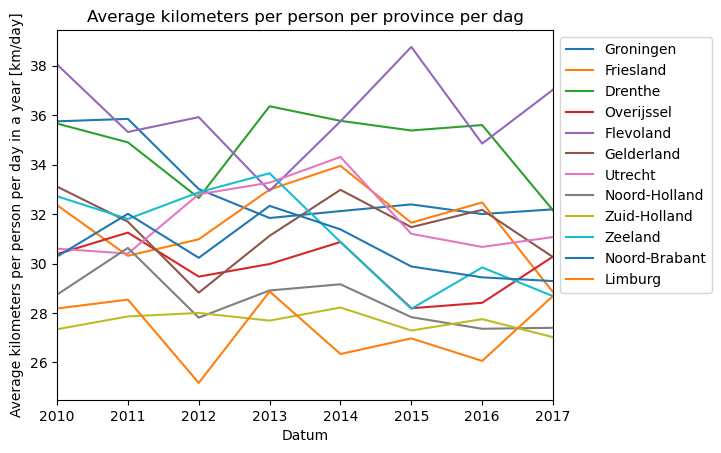

In [10]:
totaal_aantal_kilometers_per_provincie.loc[:, 'Dag'] = 1
totaal_aantal_kilometers_per_provincie.loc[:, 'Maand'] = 1

totaal_aantal_kilometers_per_provincie['Datum'] = (
    totaal_aantal_kilometers_per_provincie['Perioden'].astype(str) + '-' +
    totaal_aantal_kilometers_per_provincie['Maand'].astype(str).str.zfill(2) + '-' +
    totaal_aantal_kilometers_per_provincie['Dag'].astype(str).str.zfill(2)
)
totaal_aantal_kilometers_per_provincie['Datum'] = pd.to_datetime(totaal_aantal_kilometers_per_provincie['Datum'])
totaal_aantal_kilometers_per_provincie.set_index('Datum', inplace=True)

groningen = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Groningen (PV)']
friesland = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Friesland (PV)']
drenthe = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Drenthe (PV)']
overijssel = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Overijssel (PV)']
flevoland = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Flevoland (PV)']
gelderland = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Gelderland (PV)']
utrecht = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Utrecht (PV)']
noord_holland= totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Noord-Holland (PV)']
zuid_holland = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Zuid-Holland (PV)']
zeeland = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Zeeland (PV)']
noord_brabant = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Noord-Brabant (PV)']
limburg = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Limburg (PV)']


totaal_per_provincie = groningen[['Afstand_2']].copy()
totaal_per_provincie.rename(columns={'Afstand_2': 'Groningen'}, inplace=True)
totaal_per_provincie['Friesland'] = friesland[['Afstand_2']]
totaal_per_provincie['Drenthe'] = drenthe[['Afstand_2']]
totaal_per_provincie['Overijssel'] = overijssel[['Afstand_2']]
totaal_per_provincie['Flevoland'] = flevoland[['Afstand_2']]
totaal_per_provincie['Gelderland'] = gelderland[['Afstand_2']]
totaal_per_provincie['Utrecht'] = utrecht[['Afstand_2']]
totaal_per_provincie['Noord-Holland'] = noord_holland[['Afstand_2']]
totaal_per_provincie['Zuid-Holland'] = zuid_holland[['Afstand_2']]
totaal_per_provincie['Zeeland'] = zeeland[['Afstand_2']]
totaal_per_provincie['Noord-Brabant'] = noord_brabant[['Afstand_2']]
totaal_per_provincie['Limburg'] = limburg[['Afstand_2']]

#display(totaal_per_provincie)
totaal_per_provincie.plot()
plt.title('Average kilometers per person per province per dag')
plt.ylabel('Average kilometers per person per day in a year [km/day]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [11]:
# Handig:
# [''Groningen (PV)', 'Friesland (PV)', 'Drenthe (PV)', 'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)', 'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)', 'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)'])]